In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

# Stage 2

## Task 1

Compare the weekly statistics (Mean, Median, Mode) for cases and deaths across the US.

In [181]:
super_covid = pd.read_csv('./data/super_covid_data.csv')
covid_cases = pd.read_csv('./data/covid_confirmed_usafacts.csv')
covid_deaths = pd.read_csv('./data/covid_deaths_usafacts.csv')

# It will be easier to handle these separately so I'm importing the deaths and cases CSVs again.

# Create a dataframe I actually want to manipulate
cd_date = covid_deaths.drop(covid_deaths.columns[[0, 1, 2, 3]], axis=1, inplace=False)

#Transpose
cd_date = cd_date.transpose()

# Rename the columns after the countyFIPS so that I can merge later.
cd_date.columns = covid_deaths['countyFIPS']

# Change the index to a date and time so that I can resample it.
cd_date.index = pd.to_datetime(cd_date.index)

#Repeat this process for Cases
cc_date = covid_cases.drop(covid_cases.columns[[0, 1, 2, 3]], axis=1, inplace=False)
cc_date = cc_date.transpose()
cc_date.columns = covid_cases['countyFIPS']
cc_date.index = pd.to_datetime(cc_date.index)

start_date = pd.to_datetime('2020-06-01')
end_date = pd.to_datetime('2021-01-03')

cd_date = cd_date.T
cd_date = cd_date[[col for col in cd_date.columns if start_date <= col <= end_date]]

cc_date = cc_date.T
cc_date = cc_date[[col for col in cc_date.columns if start_date <= col <= end_date]]

cd_last_date = cd_date.iloc[:, -1:]
cd_date = cd_date.loc[:, ::7]
cd_date = pd.concat([cd_date, cd_last_date], axis=1)
cd_date

,2020-06-01,2020-06-08,2020-06-15,2020-06-22,2020-06-29,2020-07-06,2020-07-13,2020-07-20,2020-07-27,2020-08-03,...,2020-11-02,2020-11-09,2020-11-16,2020-11-23,2020-11-30,2020-12-07,2020-12-14,2020-12-21,2020-12-28,2021-01-03
countyFIPS,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1001,5,5,6,9,12,13,16,21,21,21,...,30,30,36,39,41,41,41,44,47,50
1003,9,9,9,9,10,10,12,15,18,24,...,71,83,84,84,98,138,141,147,152,169
1005,1,1,1,1,1,2,2,4,4,5,...,9,9,9,10,11,29,30,32,32,33
1007,1,1,1,1,1,1,1,2,2,3,...,15,16,17,17,17,39,39,42,42,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,0,0,0,0,0,0,0,2,2,2,...,2,4,4,6,6,11,14,15,15,16
56039,1,1,1,1,1,1,1,1,1,1,...,1,2,2,2,2,2,2,2,3,4
56041,0,0,0,0,0,0,0,0,0,0,...,3,3,4,4,4,6,7,7,7,7


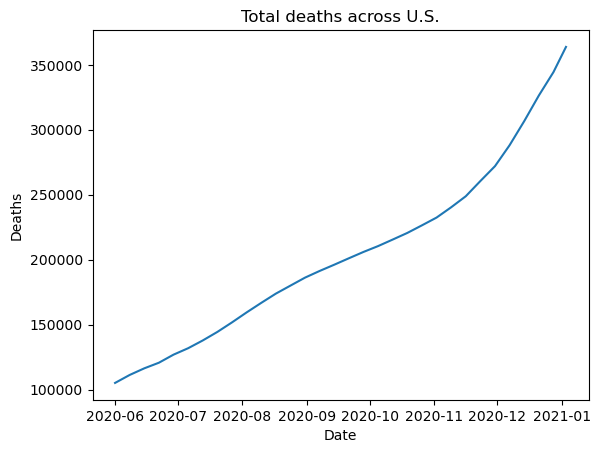

In [182]:
cd_date_total = cd_date.T.sum(axis=1)
plt.plot(cd_date_total)
plt.title('Total deaths across U.S.')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.show()

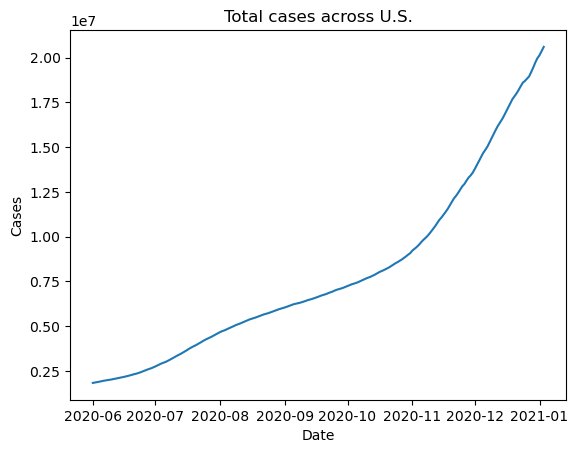

In [183]:
cc_date_total = cc_date.T.sum(axis=1)
plt.plot(cc_date_total)
plt.title('Total cases across U.S.')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.show()

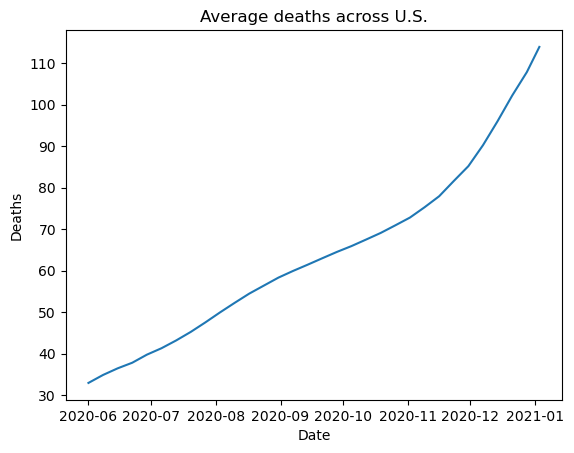

In [184]:
cd_date_mean = cd_date.T.mean(axis=1)
plt.plot(cd_date_mean)
plt.title('Average deaths across U.S.')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.show()

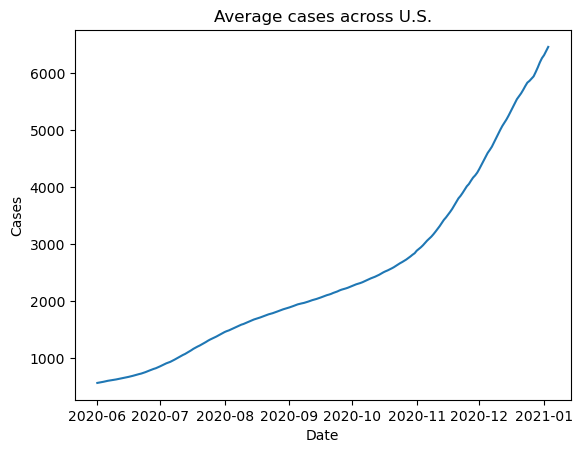

In [185]:
cc_date_mean = cc_date.T.mean(axis=1)
plt.plot(cc_date_mean)
plt.title('Average cases across U.S.')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.show()

In [186]:
world_covid_deaths = pd.read_csv('./data/world_covid_deaths.csv')
world_covid_deaths

,Entity,Code,Day,Weekly deaths
0,Afghanistan,AFG,2020-01-10,0
1,Afghanistan,AFG,2020-01-11,0
2,Afghanistan,AFG,2020-01-12,0
3,Afghanistan,AFG,2020-01-13,0
4,Afghanistan,AFG,2020-01-14,0
...,...,...,...,...
424693,Zimbabwe,ZWE,2024-09-04,0
424694,Zimbabwe,ZWE,2024-09-05,0
424695,Zimbabwe,ZWE,2024-09-06,0
424696,Zimbabwe,ZWE,2024-09-07,0


In [187]:
countries = ['Germany', 'Mexico', 'Canada', 'Australia', 'India']

country_dfs = []
for country in countries:
    country_df = world_covid_deaths[world_covid_deaths['Entity'] == country].reset_index(drop=True)
    country_df.drop(labels=['Code', 'Entity'], axis=1, inplace=True)
    country_df.set_index('Day', inplace=True)
    country_df.rename(columns={'Weekly deaths': country}, inplace=True)
    country_df = country_df.T
    country_dfs.append(country_df)


In [188]:
all_countries = pd.concat(country_dfs, axis=0)
start_date = pd.to_datetime('2020-06-01')
end_date = pd.to_datetime('2021-01-03')
all_countries.columns = pd.to_datetime(all_countries.columns)
all_countries_date_range = all_countries[[col for col in all_countries.columns if col <= end_date]]

In [196]:
last_date = all_countries_date_range.iloc[:, -1:]
weekly = all_countries_date_range.iloc[:, 3::7]

final = pd.concat([weekly, last_date], axis=1)
cumulative_deaths = final.cumsum(axis='columns')
cumulative_deaths = cumulative_deaths[[col for col in cumulative_deaths.columns if start_date <= col]]
cumulative_deaths

Day,2020-06-01,2020-06-08,2020-06-15,2020-06-22,2020-06-29,2020-07-06,2020-07-13,2020-07-20,2020-07-27,2020-08-03,...,2020-11-02,2020-11-09,2020-11-16,2020-11-23,2020-11-30,2020-12-07,2020-12-14,2020-12-21,2020-12-28,2021-01-03
Germany,9133,9177,9212,9253,9274,9300,9325,9356,9389,9426,...,13303,15213,17749,20975,24576,29056,34818,41278,47006,52750
Mexico,19598,24110,29001,33987,38556,43527,48901,54435,59899,65157,...,109267,112749,116310,120019,124079,128314,132958,138115,143890,150442
Canada,6959,7683,8021,8318,8475,8627,8723,8802,8844,8897,...,10060,10380,10771,11271,11822,12418,13166,13947,14734,15632
Australia,107,107,107,107,108,109,113,129,174,269,...,914,914,917,917,918,919,919,919,920,922
India,5164,6929,9195,13254,16095,19268,22674,26816,32063,37364,...,122111,126121,129635,133227,136696,140182,143019,145477,147622,149435


In [191]:
america = cd_date_total
america.rename('America', inplace=True)

2020-06-01    105073
2020-06-08    111212
2020-06-15    116310
2020-06-22    120632
2020-06-29    126840
2020-07-06    131791
2020-07-13    137763
2020-07-20    144338
2020-07-27    151670
2020-08-03    159346
2020-08-10    166687
2020-08-17    173809
2020-08-24    179988
2020-08-31    186151
2020-09-07    191287
2020-09-14    196097
2020-09-21    201050
2020-09-28    205926
2020-10-05    210434
2020-10-12    215462
2020-10-19    220561
2020-10-26    226403
2020-11-02    232382
2020-11-09    240311
2020-11-16    248807
2020-11-23    260531
2020-11-30    271983
2020-12-07    288120
2020-12-14    306639
2020-12-21    326365
2020-12-28    344373
2021-01-03    363775
Name: America, dtype: int64

In [202]:
world_countries_deaths_compare = pd.concat([cumulative_deaths, america.to_frame().T])

,2020-06-01,2020-06-08,2020-06-15,2020-06-22,2020-06-29,2020-07-06,2020-07-13,2020-07-20,2020-07-27,2020-08-03,...,2020-11-02,2020-11-09,2020-11-16,2020-11-23,2020-11-30,2020-12-07,2020-12-14,2020-12-21,2020-12-28,2021-01-03
Germany,9133,9177,9212,9253,9274,9300,9325,9356,9389,9426,...,13303,15213,17749,20975,24576,29056,34818,41278,47006,52750
Mexico,19598,24110,29001,33987,38556,43527,48901,54435,59899,65157,...,109267,112749,116310,120019,124079,128314,132958,138115,143890,150442
Canada,6959,7683,8021,8318,8475,8627,8723,8802,8844,8897,...,10060,10380,10771,11271,11822,12418,13166,13947,14734,15632
Australia,107,107,107,107,108,109,113,129,174,269,...,914,914,917,917,918,919,919,919,920,922
India,5164,6929,9195,13254,16095,19268,22674,26816,32063,37364,...,122111,126121,129635,133227,136696,140182,143019,145477,147622,149435
America,105073,111212,116310,120632,126840,131791,137763,144338,151670,159346,...,232382,240311,248807,260531,271983,288120,306639,326365,344373,363775


<Axes: >

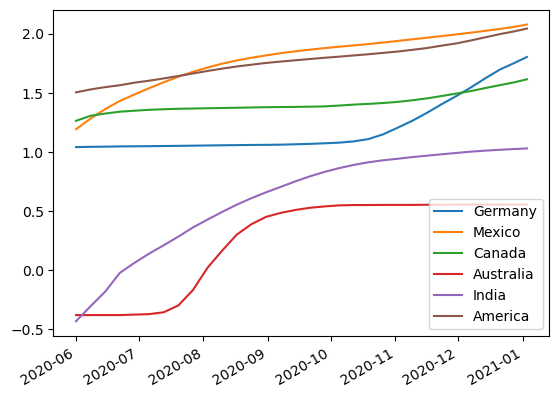

In [210]:
country_pops = {
    'Germany': 83.16e6,
    'Mexico': 126e6,
    'Canada': 38.01e6,
    'Australia': 25.65e6,
    'India': 1.396e9,
    'America': 329.5e6
}

norm = 100_000
normalized_data = pd.DataFrame()
for country, pop in country_pops.items():
    normalized_data[country] = np.log10(world_countries_deaths_compare.T[country].div(pop) * norm)
normalized_data.plot()